<a href="https://colab.research.google.com/github/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/blob/main/Machine_Learning/Patision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tqdm

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/costpetrides/Air-pollution-COVID-19-impact/main/Yearly/Data-Y/Patision.csv')
df = df.drop(columns=['DAY'])
df = df[[col for col in df.columns if col != 'O3'] + ['O3']]
df.head()

,SO2,CO,NO,NO2,BEN,O3
0,13,3.3,243,67,14.11,19
1,10,1.8,156,77,7.33,16
2,10,1.8,144,75,6.77,16
3,9,1.4,113,71,5.50,16
4,15,2.6,203,91,9.55,17


# KNN-Model

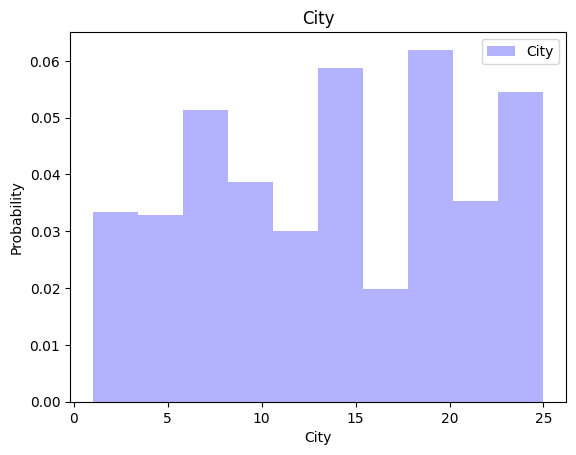

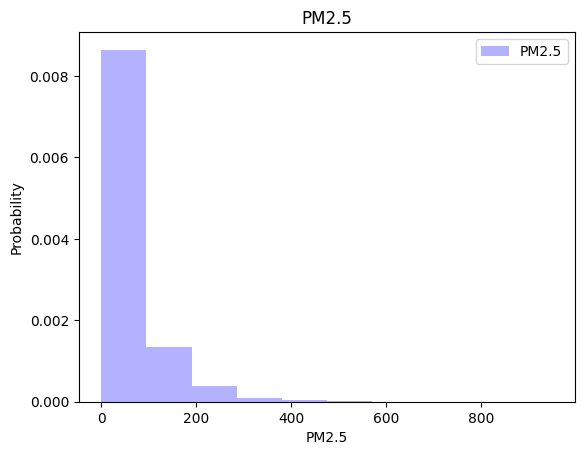

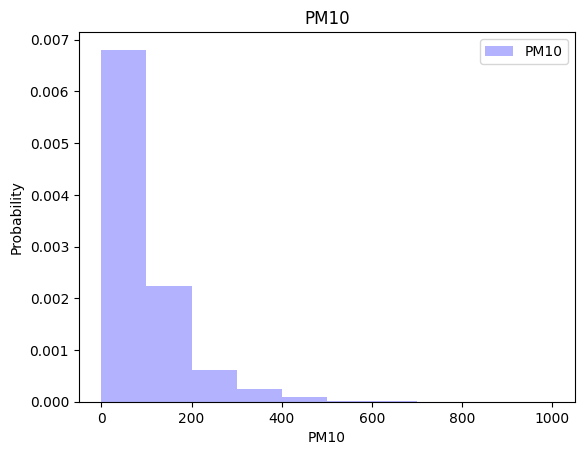

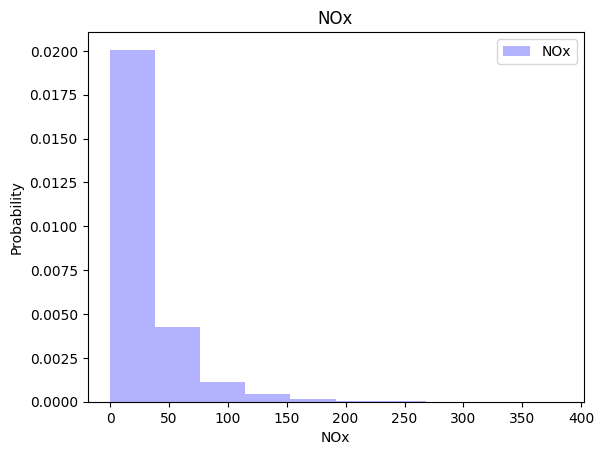

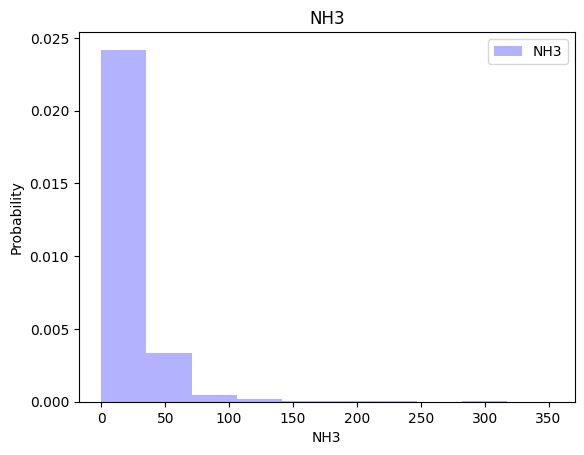

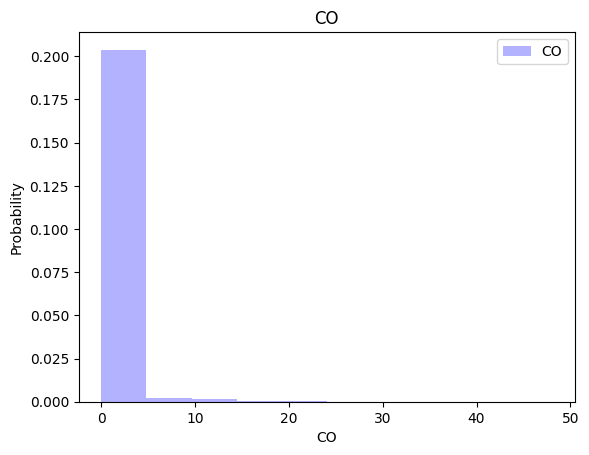

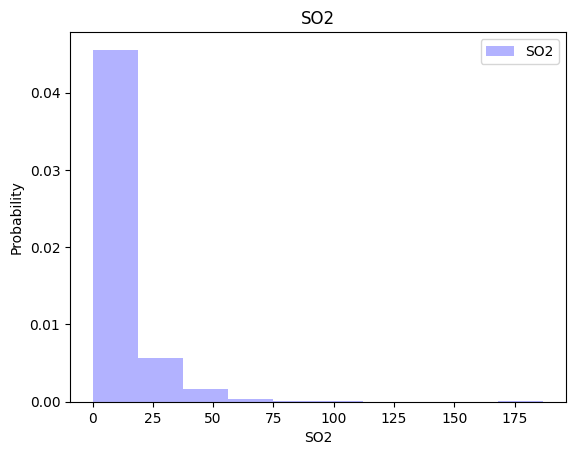

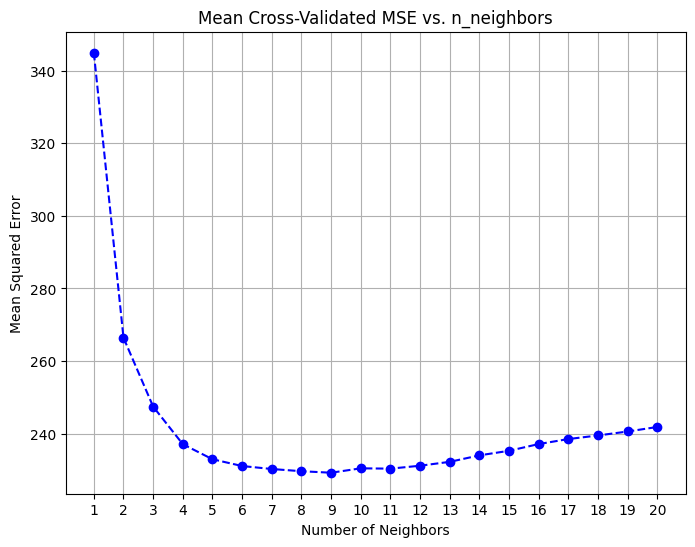

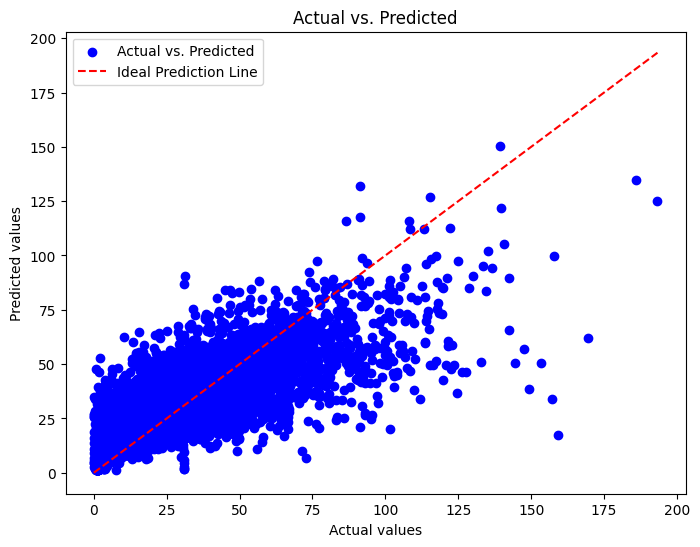

Custom Regression Report:
Mean Absolute Error: 9.93
Mean Squared Error: 214.79
R-squared (R2): 0.51


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load your dataset
df = pd.read_csv('https://raw.githubusercontent.com/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/main/DATA/Data_2.csv')

df = df.sample(frac=1).reset_index(drop=True)

# Filtering out rows where any value in a column is less than or equal to zero
for column in df.columns:
    df = df[df[column] > 0]

# Visualizations allow us to easily understand any patterns, trends, or outliers in a data set :)

cols = df.columns.tolist()    # Here we make a list with all labels names

for label in cols[:-1]:
  plt.hist(df[label], color='blue', label=label, alpha=0.3, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the range of neighbors to search
param_grid = {
    'n_neighbors': range(1, 21)
}

# Create KNN model
knn = KNeighborsRegressor()

# Use GridSearchCV to find the best number of neighbors
grid_search = GridSearchCV(knn, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# Extract mean cross-validated MSE and corresponding n_neighbors
mean_mse = -grid_result.cv_results_['mean_test_score']
n_neighbors = range(1, 21)

# Plotting mean cross-validated MSE for different values of n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors, mean_mse, marker='o', linestyle='dashed', color='blue')
plt.title('Mean Cross-Validated MSE vs. n_neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.xticks(n_neighbors)
plt.grid(True)
plt.show()

# Get the best hyperparameters found
best_n_neighbors = grid_result.best_params_['n_neighbors']

# Train the KNN model with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=best_n_neighbors)
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting predictions vs. actual values including the line for perfect predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Random Forest Regression

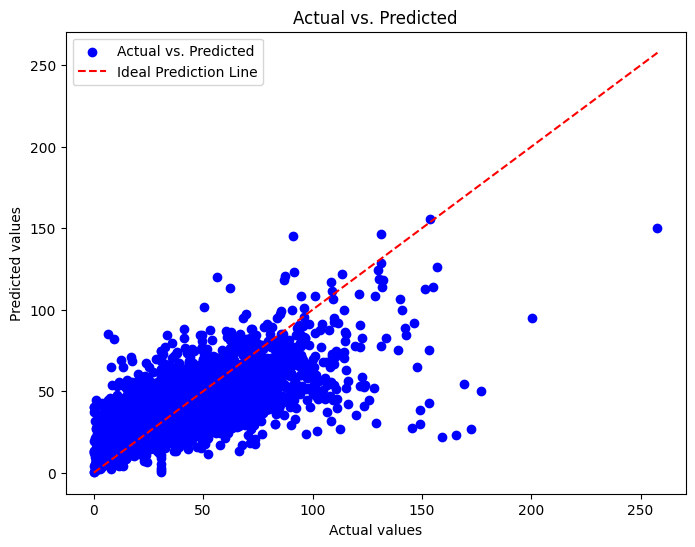

Custom Regression Report:
Mean Absolute Error: 9.58
Mean Squared Error: 209.33
R-squared (R2): 0.56


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = df.sample(frac=1).reset_index(drop=True)

# Filtering out rows where any value in a column is less than or equal to zero
for column in df.columns:
    df = df[df[column] > 0]


# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest model
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# Extract mean cross-validated MSE and corresponding hyperparameters
mean_mse = -grid_result.cv_results_['mean_test_score']
best_params = grid_result.best_params_

# Get the best hyperparameters found
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting predictions vs. actual values including the line for perfect predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


# Support Vector Regression  (SVR)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import time
from tqdm import tqdm


# Shuffle and reset index
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop rows with zero or negative values
df = df[(df > 0).all(axis=1)]

if df.empty or df.isnull().values.any():
    raise ValueError("Data contains missing values or is empty after filtering.")

# Features and target variable
X = df.iloc[:, 1:-1]  # Features, excluding 'City' and target 'O3'
y = df.iloc[:, -1]    # Target 'O3'

# Feature engineering: Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Feature selection using SVR
svr_for_feature_selection = SVR(kernel='linear')  # Using linear SVR for feature selection
svr_for_feature_selection.fit(X_poly, y)
selector = SelectFromModel(svr_for_feature_selection, threshold="mean", prefit=True)
X_selected = selector.transform(X_poly)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Improved Parameter Grid
param_dist = {
    'C': np.logspace(-3, 3, 100),  # Expanded range and more values
    'gamma': np.logspace(-3, 3, 100),
    'epsilon': np.linspace(0.01, 1, 50)
}

# Initialize RandomizedSearchCV with more iterations and folds
random_search = RandomizedSearchCV(
    SVR(),
    param_distributions=param_dist,
    n_iter=100,  # Increased number of iterations
    scoring='r2',
    cv=10,  # Increased number of folds
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model and measure time
start_time = time.time()

# Using tqdm for progress tracking
with tqdm(total=1, desc="Hyperparameter Tuning", bar_format="{l_bar}{bar} [elapsed: {elapsed}]") as pbar:
    random_search.fit(X_train, y_train)
    pbar.update(1)

elapsed_time = time.time() - start_time

# Output the results
print(f"\nElapsed Time: {elapsed_time:.2f} seconds")
best_params = random_search.best_params_
print("\nBest Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Print top results from RandomizedSearchCV
print("\nTop 5 Results from RandomizedSearchCV:")
results = pd.DataFrame(random_search.cv_results_)
top_results = results.nlargest(5, 'mean_test_score')
print(top_results[['param_C', 'param_gamma', 'param_epsilon', 'mean_test_score']])

# Train the model with the best hyperparameters
best_svr = SVR(**best_params)
best_svr.fit(X_train, y_train)

# Evaluate the model
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nCustom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Cross-validation for more robust R² estimate
cv_scores = cross_val_score(best_svr, X_selected, y, cv=10, scoring='r2')
print(f"\nMean Cross-Validated R² Score: {cv_scores.mean():.2f}")

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.legend()
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Extra Trees Regressor

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tqdm import tqdm
from joblib import Parallel, delayed

# Load and shuffle dataset
df = pd.read_csv('https://raw.githubusercontent.com/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/main/DATA/Data_2.csv')
df = df.sample(frac=1).reset_index(drop=True)

# Filtering out rows where any value in a column is less than or equal to zero
for column in df.columns:
    df = df[df[column] > 0]

# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the range of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15]
}

# Create Extra Trees Regressor model
extra_trees = ExtraTreesRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters with tqdm progress bar
def grid_search_with_progress():
    grid_search = GridSearchCV(extra_trees, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_result = grid_search.fit(X_train, y_train)
    return grid_result

# Wrap GridSearchCV to show progress
with tqdm(total=1, desc="Running GridSearchCV") as pbar:
    grid_result = grid_search_with_progress()
    pbar.update(1)

# Extract mean cross-validated MSE and corresponding hyperparameters
mean_mse = -grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

# Plotting mean cross-validated MSE for different hyperparameters
plt.figure(figsize=(8, 6))
plt.plot(range(len(mean_mse)), mean_mse, marker='o', linestyle='dashed', color='blue')
plt.xticks(range(len(mean_mse)), params, rotation=45)
plt.title('Mean Cross-Validated MSE for Different Hyperparameters')
plt.xlabel('Hyperparameters')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Get the best hyperparameters found
best_params = grid_result.best_params_

# Train the Extra Trees Regressor model with the best hyperparameters
best_extra_trees = ExtraTreesRegressor(**best_params, random_state=42)
best_extra_trees.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_extra_trees.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting predictions vs. actual values including the line for perfect predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

# Display the regression metrics
print("Regression Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


# XGBoost

In [ ]:
!pip install optuna

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/main/DATA/Data_2.csv')
df = df.sample(frac=1).reset_index(drop=True)

# Filtering out rows where any value in a column is less than or equal to zero
for column in df.columns:
    df = df[df[column] > 0]

# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1600),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0)
    }

    xgb = XGBRegressor(**params, random_state=42)
    xgb.fit(X_train, y_train)

    y_pred = xgb.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

best_params = study.best_params
best_xgb = XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the best hyperparameters and regression metrics
print("Best Hyperparameters:")
print(best_params)
print("\nRegression Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plotting predictions vs. actual values including the line for perfect predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()
